In [377]:
import sys 

sys.path.append("/home/davi/PycharmProjects/Reconhecimento-de-Padroes")

from numpy import linspace, random, array, concatenate, dot, mean, zeros, ones, ravel, exp
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import datetime

import cvxopt
import cvxopt.solvers

test_size = .2

In [378]:
noise = random.rand(100)*4.0
x = linspace(0.1,50., 100)
alpha = random.uniform(0, 1)
b = random.uniform(-1,1)
y = (alpha*x + b) - noise
print("expected: ", alpha, b)

# plt.plot(x, y, 'r+')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

x = array(x, ndmin=2, dtype=float)
y = array(y, ndmin=2, dtype=float)

data = concatenate((x, y), axis=0).T
random.shuffle(data)

expected:  0.3264866698732847 0.8879848004089217


In [379]:
def train(x_train, y_train, form=None, max_iter=None, learning_rate=None):
    if form is None:
        return "Error"
    
    forms = {"normal equation": normal_equation,
             "gradient descent": gradient_descent,
             "kernel": kernel}
    
    
    return forms[form](x_train, y_train, max_iter, learning_rate)

In [380]:
def normal_equation(x_train, y_train, form):
    linear = (dot(x_train, x_train.T)+1)**2
    weights = dot(dot(inv(linear), x_train).T, y_train)

    return weights
    

In [381]:
def gradient_descent(x_train, y_train, max_iter, learning_rate):
    number_lines, number_columns = x_train.shape
    weights = zeros((number_columns, 1))
    
    for epoch in range(max_iter):
        for point in range(number_lines):
            y_output = dot(x_train[point], weights)
            error = y_train[point] - y_output
            aux = array(learning_rate*(x_train[point]*error), ndmin=2)
            weights += aux.T
        
    return weights

In [382]:
def kernel(x_train, y_train, max_iter, learning_rate):
     
    number_lines, number_columns = x_train.shape
    gausian = zeros((number_lines, number_lines))
    for i in range(number_lines):
        for j in range(number_lines):
            gausian[i][j] = dot(x_train[i]- x_train[j],(x_train[i]- x_train[j]).T) 
    
    # print(gausian)
    sigma = .1
    gausian_kernel = exp((-1./(2.*sigma))*gausian)
    alphas = dot(gausian_kernel,  y_train)
    
    return alphas


In [383]:
def test(x_test, y_test, weights):
    
    number_examples = x_test.shape[0]
    output = dot(x_test, weights)
    error = sum((y_test-output)**2)*(1./(number_examples*1.0))
    
    return error


In [384]:
def test_kernel(x_test, x_train, y_test, alphas, weights, bias):
     
     number_lines_t, number_columns_t = x_train.shape
     number_lines, number_columns = x_trai.shape
     for i in range(number_lines):
         
     
    
     return error
    

# Primeiro utilizado o modelo com a formula fechada

In [385]:
x = array(data[:, 0], ndmin=2).T
y = array(data[:, 1], ndmin=2).T

Media do erro:  1.4640849528640947
Media de tempo:  46.6
Numero de dados de treino:  80


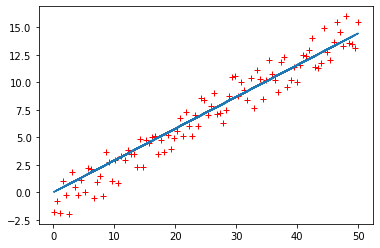

In [386]:
all_errors = []
all_times = []
for realization in range(10):
    
     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
     start = datetime.datetime.now()
     weights = normal_equation(x_train, y_train, 'normal equation')
     final = datetime.datetime.now()
     time = (final-start).microseconds
     error = test(x_test, y_test, weights)
     all_errors.append(error)
     all_times.append(time)
     
print("Media do erro: ",mean(all_errors))
print("Media de tempo: ", mean(all_times))
print("Numero de dados de treino: ", x_train.shape[0])
plt.plot(x, y, 'r+')
plt.plot(x, dot(x, weights))
plt.show()   
    
    

# Agora utilizando otimização com gradiente descendente


Media do erro:  11.130944128885558
Media de tempo:  457624.8
Numero de dados de treino:  80


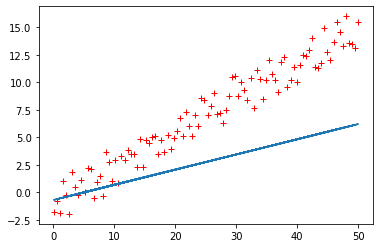

In [387]:

bias = ones((x.shape[0], 1))
x_new = concatenate((bias, x), axis=1)

all_errors = []
all_times = []
for realization in range(10):
    
     x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=test_size)
     start = datetime.datetime.now()
     weights = train(x_train, y_train, max_iter=1000, learning_rate=1e-3, form="gradient descent")
     final = datetime.datetime.now()
     time = (final-start).microseconds
     error = test(x_test, y_test, weights)
     all_errors.append(error)
     all_times.append(time)
     
print("Media do erro: ",mean(all_errors))
print("Media de tempo: ", mean(all_times))
print("Numero de dados de treino: ", x_train.shape[0]) 
   
plt.plot(x, y, 'r+')
plt.plot(x, dot(x_new, weights))
plt.show()   
    

# Agora utilizando o metodo de regressão com kernel


In [388]:
all_errors = []
all_times = []
for realization in range(10):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    start = datetime.datetime.now()
    alphas, weights = train(x_train, y_train, form='kernel')
    final = datetime.datetime.now()
    time = (final-start).microseconds
    # print(weights)
    error = test_kernel(x_test, x_train,y_test, alphas, weights, bias)
    # print(error)
    all_errors.append(error)
    all_times.append(time)
    
print("Media do erro: ",mean(all_errors))
print("Media de tempo: ", mean(all_times))
print("Numero de dados de treino: ", x_train.shape[0]) 
   

# plt.plot(x, y, 'r+')
# aux = dot(weights, x.T)
# bias = y - aux.T 
# plt.plot(x, aux.T)
# plt.show()  

shape p: (80, 80)
sahpe Q:  (80, 1)
shape A:  (1, 80)
sahpe b: (1, 1)
shape G (80, 80)
shape H: (80, 1)
     pcost       dcost       gap    pres   dres
 0: -1.2500e-02 -1.0125e+00  1e+00  7e-15  8e+01
 1: -1.2807e-02 -2.3053e-02  1e-02  4e-13  2e+00
 2: -3.5701e-02 -3.5986e-02  3e-04  5e-13  1e+00
 3: -4.4887e+00 -4.4891e+00  4e-04  3e-13  1e+00
 4: -5.5557e+04 -5.5557e+04  4e-02  2e-10  1e+00
 5: -4.1593e+20 -4.3899e+20  2e+19  2e+03  2e+05
 6: -9.2607e+20 -9.2705e+20  1e+18  3e+03  2e+05
 7: -7.7015e+22 -1.1441e+23  4e+22  1e+06  4e+06
 8: -7.5526e+23 -7.5607e+23  8e+20  1e+06  9e+06
 9:  8.4427e+24  8.4426e+24  3e+19  8e+05  3e+07
10:  8.1301e+24  8.1301e+24  1e+18  9e+05  3e+07
11:  6.4391e+26  6.4312e+26  8e+23  1e+08  1e+08
12: -1.5633e+29 -1.5712e+29  8e+26  1e+08  2e+09
13: -2.3430e+28 -2.3450e+28  2e+25  1e+08  2e+09
14: -1.0093e+29 -1.0097e+29  4e+25  9e+09  3e+09
15:  3.7773e+29  3.3153e+29  5e+28  4e+07  9e+09
16: -8.7720e+33 -1.0939e+34  2e+33  2e+10  1e+12
17:  4.8030e+34

UnboundLocalError: local variable 'solution' referenced before assignment